In [3]:
%matplotlib inline
import pandas as pd
import sqlite3
import numpy as np

In [4]:
c = sqlite3.connect('weather.db')
sql = '''
select * from weather limit 1
'''
df = pd.read_sql(sql, c)
c.close()
print(df.columns)
df

Index(['YR', 'MT', 'DY', 'TEMP MAX', 'TEMP MIN', 'TEMP AVG', 'TEMP DEP',
       'TEMP HDD', 'TEMP CDD', 'PCPN WTR', 'SNOW SNW', 'SNOW DPTH',
       'WIND AVG SPD', 'WIND MX SPD', 'WIND 2MIN DIR', 'SUNSHINE MIN',
       'SUNSHINE PSBL', 'SKY S-S', 'SKY WX', 'PK SPD', 'PK DR'],
      dtype='object')


,YR,MT,DY,TEMP MAX,TEMP MIN,TEMP AVG,TEMP DEP,TEMP HDD,TEMP CDD,PCPN WTR,...,SNOW DPTH,WIND AVG SPD,WIND MX SPD,WIND 2MIN DIR,SUNSHINE MIN,SUNSHINE PSBL,SKY S-S,SKY WX,PK SPD,PK DR
0,2015,2015/01,2015/01/01,31,14,23,4,42,0,0.0,...,0,7.4,15,240,M,M,5,None,24,240


In [57]:
c = sqlite3.connect ('weather.db')
sql = '''
select "MT", "TEMP AVG" from weather group by MT
'''
data_frame_0 = pd.read_sql(sql, c)
c.close()
data_frame_0

,MT,TEMP AVG
0,2015/01,23
1,2015/02,17
2,2015/03,21
3,2015/04,52
4,2015/05,52
5,2015/06,53
6,2015/07,62
7,2015/08,74
8,2015/09,79
9,2015/10,51


In [58]:
c = sqlite3.connect('cost.db')
sql = '''
select * from cost limit 1
'''
df = pd.read_sql(sql, c)
c.close()
print(df.columns)
df

Index(['YR', 'MT', 'DY', 'ORG', 'OBJECT', 'PROJECT', 'ACCOUNT', 'DESCRIPTION',
       'YEAR', 'PER', 'JOURNAL', 'EFF DATE', 'SRC', 'T', 'REF1', 'PO/REF2',
       'REF3', 'REFERENCE', 'AMOUNT'],
      dtype='object')


,YR,MT,DY,ORG,OBJECT,PROJECT,ACCOUNT,DESCRIPTION,YEAR,PER,JOURNAL,EFF DATE,SRC,T,REF1,PO/REF2,REF3,REFERENCE,AMOUNT
0,2015,2015/01,2015/01/01,44301,57140,0,1100-40-44-443-4401-0000-00000-00000-57140-00000,SW ADM ID CHRG EN,2015,1,4423.0,2015/01/01,GEN,1.0,MAINTE,JAN MAINT,None,MMB MAINTE,1059.13


In [59]:
c = sqlite3.connect ("cost.db")
sql = '''
select sum("AMOUNT") as expense, DESCRIPTION from cost group by DESCRIPTION order by expense desc 
'''
df = pd.read_sql(sql, c)
df = df[df["expense"] > 100000]
c.close()
df

,expense,DESCRIPTION
0,4351043.73,ST SN PLOW PERM WAGES
1,4320010.32,ST SN PLOW ID CHRG FS
2,3394262.67,ST SN PLOW SNOW SUP
3,1837970.64,ST SN PLOW OVRTM PERM
4,1546372.71,SW ADM PERM WAGES
5,1358845.50,ST SN PLOW SNOW REMVL
6,1002685.72,ST SN PLOW HLTH INS B
7,518621.44,ST SN PLOW LEASE EQUP
8,475296.22,ST SN PLOW FICA MEDIC
9,424121.62,ST SN PLOW WI RET SY


In [87]:
c = sqlite3.connect ("cost.db")
sql = '''
select sum("AMOUNT") as expense, MT from cost where DESCRIPTION = "ST SN PLOW PERM WAGES" group by MT 
order by MT 
'''
data_frame10 = pd.read_sql(sql, c)
c.close()
data_frame10

,expense,MT
0,77516.19,2015/01
1,151935.84,2015/02
2,100829.79,2015/03
3,47127.60,2015/04
4,36625.06,2015/05
5,30302.49,2015/06
6,27854.75,2015/07
7,29732.13,2015/08
8,34993.88,2015/09
9,53606.22,2015/10


Text(0, 0.5, 'Total expense')

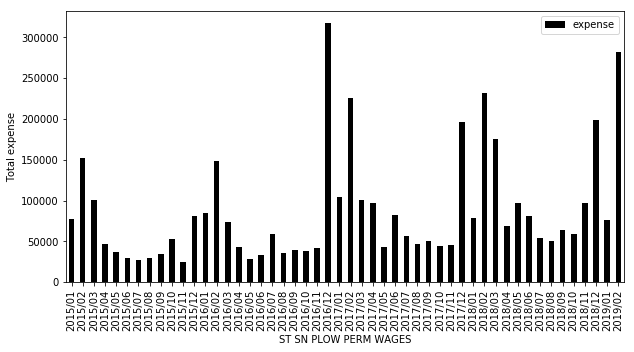

In [91]:
ax = data_frame10.plot.bar(x = "MT", y = "expense", figsize = (10, 5), color = "black")
ax.set_xlabel("ST SN PLOW PERM WAGES")
ax.set_ylabel("Total expense")

In [61]:
c_1 = sqlite3.connect ("cost.db")
sql_1 = '''
select sum("AMOUNT") as expense, MT from cost where DESCRIPTION = "ST SN PLOW ID CHRG FS" group by MT 
order by MT 
'''
data_frame_1 = pd.read_sql(sql_1, c_1)
c.close()
data_frame_1

,expense,MT
0,69554.00,2015/01
1,60674.26,2015/02
2,60649.25,2015/03
3,131052.74,2015/04
4,22556.08,2015/05
5,23709.79,2015/06
6,25495.26,2015/07
7,26310.72,2015/08
8,28441.44,2015/09
9,31467.08,2015/10


Text(0, 0.5, 'expense')

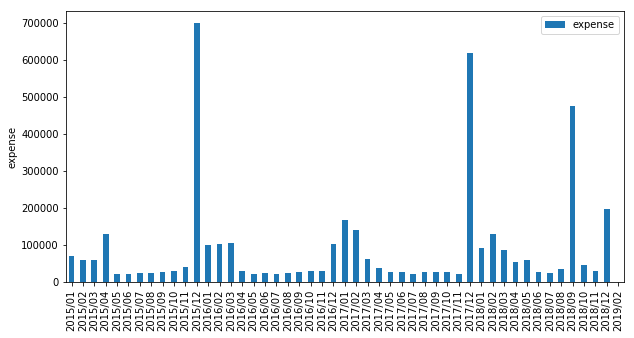

In [62]:
ax = data_frame_1.plot.bar(x = "MT", figsize = (10, 5))
ax.set_xlabel('')
ax.set_ylabel('expense')

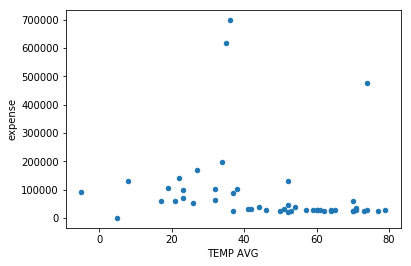

In [64]:
cb = data_frame_0.merge(data_frame_1)
cb.plot.scatter(x = "TEMP AVG", y = "expense")

In [48]:
c_2 = sqlite3.connect ("cost.db")
sql_2 = '''
select sum("AMOUNT") as expense, MT from cost where DESCRIPTION = "ST SN PLOW SNOW SUP" group by MT 
order by MT 
'''
data_frame_2 = pd.read_sql(sql_2, c_2)
c.close()
data_frame_2

,expense,MT
0,-0.10,2015/01
1,209963.45,2015/02
2,24587.68,2015/03
3,248067.76,2015/04
4,-1606.58,2015/05
5,67682.13,2015/11
6,74634.26,2015/12
7,17903.30,2016/01
8,9618.21,2016/02
9,437793.99,2016/03


Text(0, 0.5, 'expense')

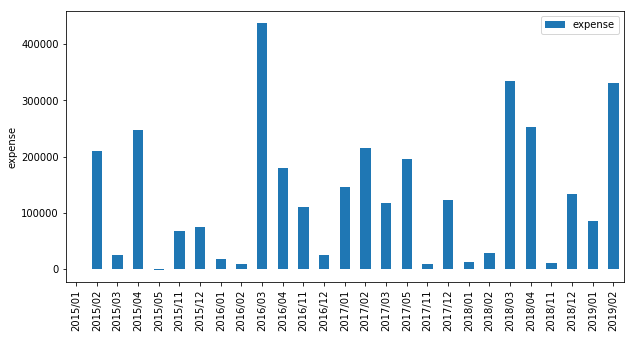

In [49]:
ax = data_frame_2.plot.bar(x = "MT", figsize = (10, 5))
ax.set_xlabel('')
ax.set_ylabel('expense')

In [70]:
cb_1 = data_frame_0.merge(data_frame_2)
cb_1

,MT,TEMP AVG,expense
0,2015/01,23,-0.10
1,2015/02,17,209963.45
2,2015/03,21,24587.68
3,2015/04,52,248067.76
4,2015/05,52,-1606.58
5,2015/11,54,67682.13
6,2015/12,36,74634.26
7,2016/01,23,17903.30
8,2016/02,32,9618.21
9,2016/03,19,437793.99


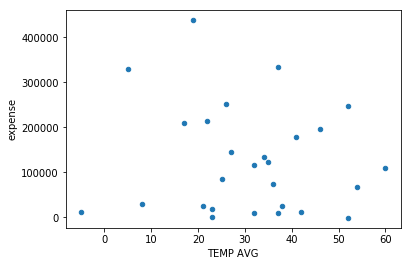

In [71]:
cb_1.plot.scatter(x = "TEMP AVG", y = "expense")

Text(0, 0.5, 'expense')

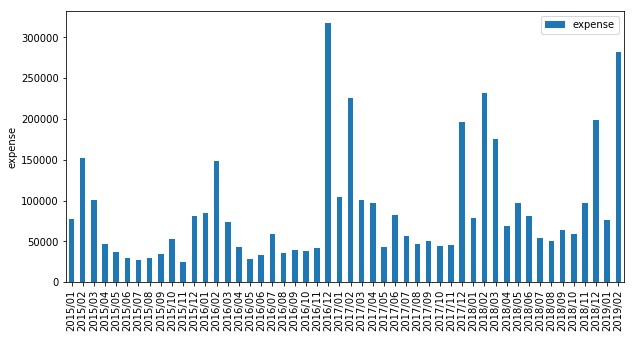

In [9]:
ax = data_frame2.plot.bar(x = "MT", figsize = (10, 5))
ax.set_xlabel('')
ax.set_ylabel('expense')

In [10]:
type(df["expense"])

pandas.core.series.Series

In [11]:
combine = data_frame.merge(data_frame2)
data_frame.merge(data_frame2)

,MT,TEMP AVG,expense
0,2015/01,23,77516.19
1,2015/02,17,151935.84
2,2015/03,21,100829.79
3,2015/04,52,47127.60
4,2015/05,52,36625.06
5,2015/06,53,30302.49
6,2015/07,62,27854.75
7,2015/08,74,29732.13
8,2015/09,79,34993.88
9,2015/10,51,53606.22


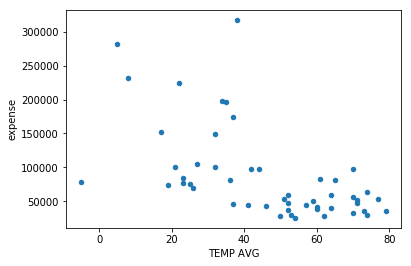

In [12]:
combine.plot.scatter(x = "TEMP AVG", y = "expense")

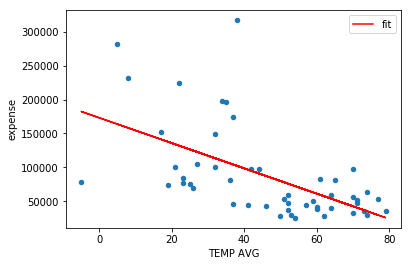

In [13]:
pairs = pd.concat([combine["TEMP AVG"], combine["expense"]], axis = 1)
pairs["1"] = 1

res = np.linalg.lstsq(
    pairs[["TEMP AVG", "1"]], pairs['expense'], rcond = None)

coefficients = res[0]
m = coefficients[0]
n = coefficients[1]

ax = pairs.plot.scatter(x = "TEMP AVG", y = "expense",)
pairs["fit"] = pairs["TEMP AVG"] * m + n 
pairs.plot.line(x = "TEMP AVG", y = "fit", c = "red", ax = ax)

In [14]:
c = sqlite3.connect ('weather.db')
sql = '''
select "MT", "PCPN WTR" from weather group by MT
'''
data_frame = pd.read_sql(sql, c)
c.close()
data_frame

,MT,PCPN WTR
0,2015/01,0.00
1,2015/02,0.32
2,2015/03,0.00
3,2015/04,0.00
4,2015/05,0.00
5,2015/06,0.00
6,2015/07,0.00
7,2015/08,0.00
8,2015/09,0.00
9,2015/10,0.00


In [15]:
combine2 = data_frame.merge(data_frame2)
data_frame.merge(data_frame2)

,MT,PCPN WTR,expense
0,2015/01,0.00,77516.19
1,2015/02,0.32,151935.84
2,2015/03,0.00,100829.79
3,2015/04,0.00,47127.60
4,2015/05,0.00,36625.06
5,2015/06,0.00,30302.49
6,2015/07,0.00,27854.75
7,2015/08,0.00,29732.13
8,2015/09,0.00,34993.88
9,2015/10,0.00,53606.22


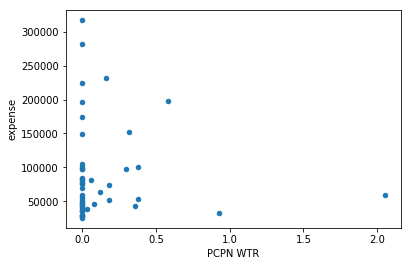

In [16]:
combine2.plot.scatter(x = "PCPN WTR", y = "expense")

In [17]:
c = sqlite3.connect ('weather.db')
sql = '''
select "MT", "SNOW DPTH" from weather group by MT
'''
data_frame = pd.read_sql(sql, c)
c.close()
data_frame

,MT,SNOW DPTH
0,2015/01,0
1,2015/02,2
2,2015/03,6
3,2015/04,0
4,2015/05,0
5,2015/06,0
6,2015/07,0
7,2015/08,0
8,2015/09,0
9,2015/10,0


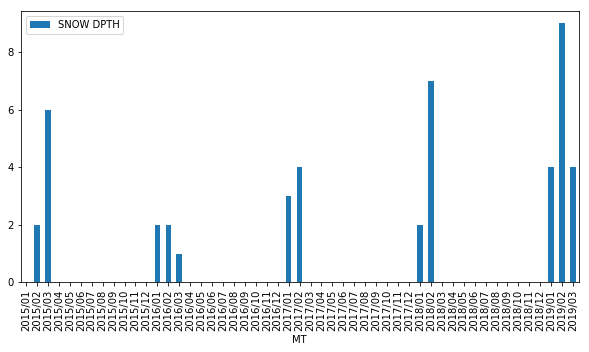

In [18]:
data_frame.plot.bar(x = "MT", figsize = (10, 5))

In [19]:
combine3 = data_frame.merge(data_frame2)
data_frame.merge(data_frame2)

,MT,SNOW DPTH,expense
0,2015/01,0,77516.19
1,2015/02,2,151935.84
2,2015/03,6,100829.79
3,2015/04,0,47127.60
4,2015/05,0,36625.06
5,2015/06,0,30302.49
6,2015/07,0,27854.75
7,2015/08,0,29732.13
8,2015/09,0,34993.88
9,2015/10,0,53606.22


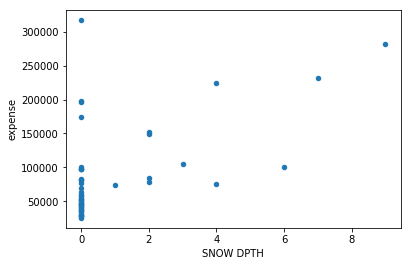

In [20]:
combine3.plot.scatter(x = "SNOW DPTH", y = "expense")

In [21]:
combine3.corr()

,SNOW DPTH,expense
SNOW DPTH,1.000000,0.556074
expense,0.556074,1.000000


In [22]:
c = sqlite3.connect ('weather.db')
sql = '''
select "MT", avg("WIND AVG SPD") as "SPD" from weather group by MT
'''
data_frame = pd.read_sql(sql, c)
c.close()
data_frame

,MT,SPD
0,2015/01,6.066667
1,2015/02,8.454545
2,2015/03,7.036364
3,2015/04,7.314286
4,2015/05,7.442857
5,2015/06,6.911111
6,2015/07,5.285714
7,2015/08,5.114286
8,2015/09,7.550000
9,2015/10,8.862500


In [23]:
combine3 = data_frame.merge(data_frame2)
data_frame.merge(data_frame2)

,MT,SPD,expense
0,2015/01,6.066667,77516.19
1,2015/02,8.454545,151935.84
2,2015/03,7.036364,100829.79
3,2015/04,7.314286,47127.60
4,2015/05,7.442857,36625.06
5,2015/06,6.911111,30302.49
6,2015/07,5.285714,27854.75
7,2015/08,5.114286,29732.13
8,2015/09,7.550000,34993.88
9,2015/10,8.862500,53606.22


In [24]:
combine3["SPD"][0]

6.066666666666666

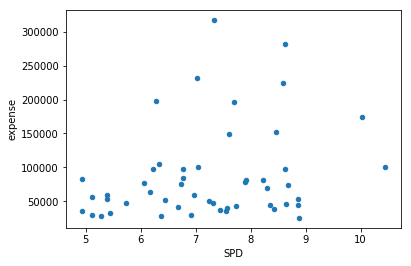

In [25]:
combine3.plot.scatter(x = "SPD", y = "expense")

,SPD,expense
SPD,1.000000,0.252833
expense,0.252833,1.000000


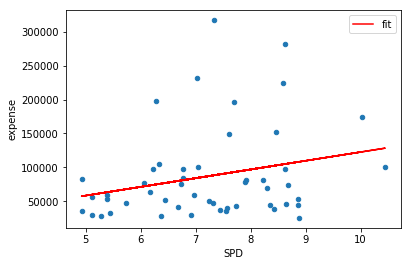

In [26]:
combine = combine3
pairs = pd.concat([combine["SPD"], combine["expense"]], axis = 1)
pairs["1"] = 1

res = np.linalg.lstsq(
    pairs[["SPD", "1"]], pairs['expense'], rcond = None)

coefficients = res[0]
m = coefficients[0]
n = coefficients[1]

ax = pairs.plot.scatter(x = "SPD", y = "expense",)
pairs["fit"] = pairs["SPD"] * m + n 
pairs.plot.line(x = "SPD", y = "fit", c = "red", ax = ax)
combine.corr()

In [27]:
print("y = " + str(m) + " x + " + str(n))

y = 12848.45766920416 x + -5847.642017195051


In [28]:
c = sqlite3.connect ('weather.db')
sql = '''
select "MT", avg("SKY S-S") as SS from weather group by MT
'''
data_frame = pd.read_sql(sql, c)
c.close()
data_frame

,MT,SS
0,2015/01,6.777778
1,2015/02,6.181818
2,2015/03,6.181818
3,2015/04,3.571429
4,2015/05,6.571429
5,2015/06,6.444444
6,2015/07,4.000000
7,2015/08,5.142857
8,2015/09,4.166667
9,2015/10,5.250000


In [29]:
combine3 = data_frame.merge(data_frame2)
data_frame.merge(data_frame2)

,MT,SS,expense
0,2015/01,6.777778,77516.19
1,2015/02,6.181818,151935.84
2,2015/03,6.181818,100829.79
3,2015/04,3.571429,47127.60
4,2015/05,6.571429,36625.06
5,2015/06,6.444444,30302.49
6,2015/07,4.000000,27854.75
7,2015/08,5.142857,29732.13
8,2015/09,4.166667,34993.88
9,2015/10,5.250000,53606.22


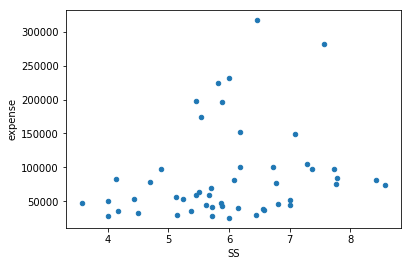

In [30]:
combine3.plot.scatter(x = "SS", y = "expense")

,SS,expense
SS,1.000000,0.230242
expense,0.230242,1.000000


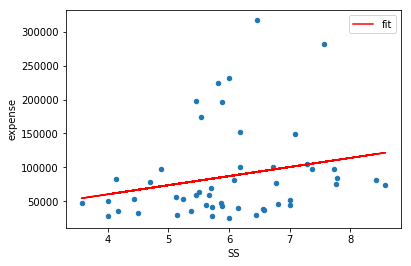

In [31]:
combine = combine3
pairs = pd.concat([combine["SS"], combine["expense"]], axis = 1)
pairs["1"] = 1

res = np.linalg.lstsq(
    pairs[["SS", "1"]], pairs['expense'], rcond = None)

coefficients = res[0]
m = coefficients[0]
n = coefficients[1]

ax = pairs.plot.scatter(x = "SS", y = "expense",)
pairs["fit"] = pairs["SS"] * m + n 
pairs.plot.line(x = "SS", y = "fit", c = "red", ax = ax)
combine.corr()

In [32]:
print("y = " + str(m) + " x + " + str(n))

y = 13434.625542382671 x + 6510.019085723574


In [40]:
c = sqlite3.connect('UWDataScienceProject.db')
df = pd.read_sql('select * from data', c)
c.close()
df

,Agency,Organization,Account Type,Character Code,Object,2015,2016,2017,2018
0,50 - LIBRARY,50100 - LIB PUBLIC SERVICE,Revenue,41 - GENERAL REVENUES,41110 - REAL ESTATE TAXES,-11355535.0,-11941627.0,-12603779.0,-13080448.0
1,50 - LIBRARY,50300 - LIB COL RES & ACCESS,Revenue,41 - GENERAL REVENUES,41110 - REAL ESTATE TAXES,-2056164.0,-2222626.0,-2199357.0,-2268969.0
2,50 - LIBRARY,50400 - LIB FACILITIES,Revenue,41 - GENERAL REVENUES,41110 - REAL ESTATE TAXES,-1766869.0,-1768986.0,-1963404.0,-1976738.0
3,51 - PARKS,51220 - PARK MTC FORESTRY GENERAL,Revenue,49 - TRANSFER IN,49124 - TRANSFER IN FROM OTHER RESTRIC,-1000000.0,-2500000.0,-3100342.0,NaN
4,44 - STREETS,44220 - ST RECYCLING COLLECTION,Revenue,43 - CHARGES FOR SERVICES,43445 - SALE OF RECYCLABLES,-841013.0,-866761.0,-1218608.0,-892803.0
5,65 - PLANNING,65300 - PL METROPOLITAN PLANNING ORG,Revenue,49 - TRANSFER IN,49123 - TRANSFER IN FROM GRANTS,-683795.0,-809851.0,NaN,NaN
6,20 - MUNICIPAL COURT,20100 - MUNICIPAL COURT,Revenue,43 - CHARGES FOR SERVICES,43120 - COURT FEES,-640287.0,-624341.0,-515025.0,-421900.0
7,30 - FIRE,30252 - FIRE INSPECTION ELEVATOR,Revenue,44 - LICENSES AND PERMITS,44230 - ELEVATOR PERMITS AND INSPECTS,-617670.0,-606447.0,-534775.0,-555937.0
8,40 - ENGINEERING,40470 - ENG FAC MAINT ADMIN,Expense,58 - INTER DEPART BILLING,58131 - ID BILLING TO POLICE,-531289.0,-533701.0,-536303.0,-611303.0
9,50 - LIBRARY,50300751 - LIB COL RES & ACCESS CENTRAL,Revenue,43 - CHARGES FOR SERVICES,43568 - CATALOGING SERVICES,-455858.0,-454255.0,-454255.0,-454290.0


In [82]:
c = sqlite3.connect('../new_data_1/position_tracker.db')
df = pd.read_sql('select * from position_table where ', c)
c.close()
df

,Month,Employee #,Filled Position Description,Filled FTE Percent,Current Salary
0,April-17,3504.0,ASST CITY ATTY,1.0,143627.0
1,April-17,2114.0,LITIGATION ASST 1,1.0,67232.0
2,April-17,1351.0,CLERK-TYP 2,1.0,48896.0
3,April-17,3630.0,ASST CITY ATTY,1.0,144933.0
4,April-17,3074.0,SECRETARY 3-LEGAL,1.0,59614.0
5,April-17,2963.0,ATTY CITY,1.0,160114.0
6,April-17,3669.0,ASST CITY ATTY,1.0,77420.0
7,April-17,1121.0,LEGAL OFFICE ASST,1.0,48065.0
8,April-17,2665.0,SECRETARY 2-LEGAL,1.0,54038.0
9,April-17,1381.0,ASST CITY ATTY,1.0,84205.0
